# AML Data Preprocessing
- Using the IBM dataset for AML: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml
- Dataset is generated by IBM Box Generator, models transactions and illicit activities.
- Original dataset for training will be extensively large, for initial stages of thesis, using smaller dataset of 500,000 transactions.
- In the following we will:
1. explore the data
2. determine nodes and edges
3. determine node and edge attributes
4. create visualization using NetworkX, PyVis, or Graph-tool

* Attributes on ACCOUNT
    * Bank account
    * Account balance
    * BIN number
    * Number of transactions (calculated)
    * Receiving Currency
* Attributes on TRANSACTIONS
    * Payment amount
    * Payment Type
    * Payment Currency (based on “receiving currency” of outgoing bank account)
    * Time


##### *-----IMPORT LIBRARIES-----*

In [12]:
! pip3 install torch numpy pandas matplotlib

In [13]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### *-----DATA EXPLORATION-----*

In [15]:
filename = "/Users/owhy/Documents/Datasets/HI-Small_Trans.csv"

In [16]:
data = pd.read_csv(filename)
data.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [17]:
print(f"---- shape ----\n - {data.shape}")

---- shape ----
 - (5078345, 11)


In [18]:
print("---- info ----")
data.info()

---- info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [19]:
print("---- basic calculations ----")
data.describe()

---- basic calculations ----


,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
std,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02
min,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00


##### *-----Creating Graph-----*

In [20]:
data

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


# SKIP

In [21]:
def load_node_csv(path, index_col, encoders=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping

In [22]:
load_node_csv(filename,4)

(None,
 {'8000EBD30': 0,
  '8000F5340': 1,
  '8000F4670': 2,
  '8000F5030': 3,
  '8000F5200': 4,
  '8000F5AD0': 5,
  '8000EBAC0': 6,
  '8000EC1E0': 7,
  '8017BF800': 8,
  '80AEF5310': 9,
  '8011305D0': 10,
  '8000F47F0': 11,
  '812ED62E0': 12,
  '812ED6380': 13,
  '805B34210': 14,
  '80012FE50': 15,
  '80012FEA0': 16,
  '8005DFEB0': 17,
  '8005E18F0': 18,
  '8005E24C0': 19,
  '8005F2D30': 20,
  '800131480': 21,
  '8131A9A80': 22,
  '810B0FB40': 23,
  '813600910': 24,
  '8005FD390': 25,
  '8005FD430': 26,
  '8006A3840': 27,
  '8006A3890': 28,
  '8006AF500': 29,
  '8006AF550': 30,
  '80C132DC0': 31,
  '80A3C7390': 32,
  '800AC8E30': 33,
  '800AC9010': 34,
  '800ACA9C0': 35,
  '801008340': 36,
  '801008520': 37,
  '800AC8E80': 38,
  '814233CC0': 39,
  '8121CF4B0': 40,
  '8082250C0': 41,
  '8065002B0': 42,
  '80974B620': 43,
  '8010098B0': 44,
  '80100A2C0': 45,
  '80100D180': 46,
  '80100DB80': 47,
  '8012261B0': 48,
  '801009860': 49,
  '80805AE20': 50,
  '803177AF0': 51,
  '80805A830': 

# END

### NODES and EDGES

Nodes = Bank Accounts -- bank account number
* BIN Number
* Receiving Currency

* Number of transactions (degree matrix --> calculated based on incoming and outcoming flows)

Edges = transactions -- payment amount
* Payment Type
* Payment Currency
* Date and Time

* Account Balance (before transactions)

In [25]:
data

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [30]:
number_of_accounts = max(data["Account"].value_counts())
print(f"Number of bank accounts: {number_of_accounts}")

Number of bank accounts: 168672


In [27]:
node_features = data[["From Bank", "Receiving Currency"]]

### One-hot encoding & NODE FEATURES

In [35]:
# Convert non-numeric columns
positions = node_features["Receiving Currency"].str.split(",", expand=True) # creating new columns by splitting receiving currency --> all are added
node_features["first_position"] = positions[0] # first currency in each row is extracted --> actual currency used and that we want as TRUE
# One-hot encoding 
node_features = pd.concat([node_features, pd.get_dummies(node_features["first_position"])], axis=1, join='inner') # effectively adds actual currency to dummy variables/columns
node_features.drop(["Receiving Currency", "first_position"], axis=1, inplace=True) # drop the axiliary columns
node_features.head() 

,From Bank,Australian Dollar,Bitcoin,Brazil Real,Canadian Dollar,Euro,Mexican Peso,Ruble,Rupee,Saudi Riyal,...,Mexican Peso,Ruble,Rupee,Saudi Riyal,Shekel,Swiss Franc,UK Pound,US Dollar,Yen,Yuan
0,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3208,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3209,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Node Feature Matrix 

In [39]:
# Convert to numpy
x = node_features.to_numpy()
x.shape # [num_nodes x num_features]

# TODO nodes should be bank accounts and not transactions. Bank accounts have unique receiving currencies and "bank BINs"


(5078345, 31)

### One-hot encoding & EDGE FEATURES

In [ ]:
edge_features = data[["Payment Format", "Payment Currency", "Timestamp"]]

In [59]:
import datetime
import os
from typing import Callable, Optional
import pandas as pd
from sklearn import preprocessing
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import torch

from torch_geometric.data import Data, InMemoryDataset

pd.set_option("display.max_columns", None)


class AMLtoGraph(InMemoryDataset):

    def __init__(
        self,
        root: str,
        edge_window_size: int = 10,
        transform: Optional[Callable] = None,
        pre_transform: Optional[Callable] = None,
    ):
        self.edge_window_size = edge_window_size
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self) -> str:
        return "HI-Small_Trans.csv"

    @property
    def processed_file_names(self) -> str:
        return "data.pt"

    @property
    def num_nodes(self) -> int:
        return self._data.edge_index.max().item() + 1

    def df_label_encoder(self, df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

    def preprocess(self, df):
        df = self.df_label_encoder(
            df, ["Payment Format", "Payment Currency", "Receiving Currency"]
        )
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
        df["Timestamp"] = df["Timestamp"].apply(lambda x: x.value)
        df["Timestamp"] = (df["Timestamp"] - df["Timestamp"].min()) / (
            df["Timestamp"].max() - df["Timestamp"].min()
        )

        df["Account"] = df["From Bank"].astype(str) + "_" + df["Account"]
        df["Account.1"] = df["To Bank"].astype(str) + "_" + df["Account.1"]
        df = df.sort_values(by=["Account"])
        receiving_df = df[["Account.1", "Amount Received", "Receiving Currency"]]
        paying_df = df[["Account", "Amount Paid", "Payment Currency"]]
        receiving_df = receiving_df.rename({"Account.1": "Account"}, axis=1)
        currency_ls = sorted(df["Receiving Currency"].unique())

        return df, receiving_df, paying_df, currency_ls

    def get_all_account(self, df):
        ldf = df[["Account", "From Bank"]]
        rdf = df[["Account.1", "To Bank"]]
        suspicious = df[df["Is Laundering"] == 1]
        s1 = suspicious[["Account", "Is Laundering"]]
        s2 = suspicious[["Account.1", "Is Laundering"]]
        s2 = s2.rename({"Account.1": "Account"}, axis=1)
        suspicious = pd.concat([s1, s2], join="outer")
        suspicious = suspicious.drop_duplicates()

        ldf = ldf.rename({"From Bank": "Bank"}, axis=1)
        rdf = rdf.rename({"Account.1": "Account", "To Bank": "Bank"}, axis=1)
        df = pd.concat([ldf, rdf], join="outer")
        df = df.drop_duplicates()

        df["Is Laundering"] = 0
        df.set_index("Account", inplace=True)
        df.update(suspicious.set_index("Account"))
        df = df.reset_index()
        return df

    def paid_currency_aggregate(self, currency_ls, paying_df, accounts):
        for i in currency_ls:
            temp = paying_df[paying_df["Payment Currency"] == i]
            accounts["avg paid " + str(i)] = (
                temp["Amount Paid"].groupby(temp["Account"]).transform("mean")
            )
        return accounts

    def received_currency_aggregate(self, currency_ls, receiving_df, accounts):
        for i in currency_ls:
            temp = receiving_df[receiving_df["Receiving Currency"] == i]
            accounts["avg received " + str(i)] = (
                temp["Amount Received"].groupby(temp["Account"]).transform("mean")
            )
        accounts = accounts.fillna(0)
        return accounts

    def get_edge_df(self, accounts, df):
        accounts = accounts.reset_index(drop=True)
        accounts["ID"] = accounts.index
        mapping_dict = dict(zip(accounts["Account"], accounts["ID"]))
        df["From"] = df["Account"].map(mapping_dict)
        df["To"] = df["Account.1"].map(mapping_dict)
        df = df.drop(["Account", "Account.1", "From Bank", "To Bank", "Payment Format", "Payment Currency"], axis=1)

        edge_index = torch.stack(
            [torch.from_numpy(df["From"].values), torch.from_numpy(df["To"].values)],
            dim=0,
        )

        df = df.drop(["Is Laundering", "From", "To"], axis=1)

        edge_attr = torch.from_numpy(df.values).to(torch.float)
        return edge_attr, edge_index

    def get_node_attr(self, currency_ls, paying_df, receiving_df, accounts):
        node_df = self.paid_currency_aggregate(currency_ls, paying_df, accounts)
        node_df = self.received_currency_aggregate(currency_ls, receiving_df, node_df)
        node_label = torch.from_numpy(node_df["Is Laundering"].values).to(torch.float)
        node_df = node_df.drop(["Account", "Is Laundering"], axis=1)
        node_df = self.df_label_encoder(node_df, ["Bank"])
        node_df = torch.from_numpy(node_df.values).to(torch.float)
        return node_df, node_label

In [63]:
dataset = AMLtoGraph("/Users/owhy/Downloads")
print(type(dataset))

<class '__main__.AMLtoGraph'>


In [61]:
dataset[0]

Data(x=[515088, 31], edge_index=[2, 5078345], edge_attr=[5078345, 6], y=[515088])

In [10]:
print("Node features shape:", example.x.shape)
print("Edge index shape:", example.edge_index.shape)
print("Edge attributes shape:", example.edge_attr.shape)
print("Labels shape:", example.y.shape)

Node features shape: torch.Size([515088, 31])
Edge index shape: torch.Size([2, 5078345])
Edge attributes shape: torch.Size([5078345, 6])
Labels shape: torch.Size([515088])


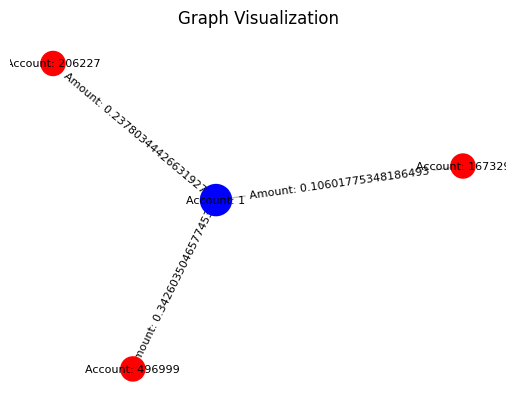

In [45]:
# Convert the PyTorch Geometric Data object to a NetworkX graph
def to_networkx(data, node_id, num_transactions=10):
    G = nx.Graph()

    # Add the central node
    G.add_node(node_id, label=f"Account: {node_id}", color="blue", size=500)

    # Get the indices of transactions related to the given node
    related_edges = (data.edge_index[0] == node_id).nonzero().squeeze()
    num_related_edges = min(num_transactions, related_edges.numel())

    # Add the related transactions and corresponding nodes
    for i in range(num_related_edges):
        transaction_id = related_edges[i].item()
        source_node_id = data.edge_index[0, transaction_id].item()
        target_node_id = data.edge_index[1, transaction_id].item()
        transaction_amount = data.edge_attr[transaction_id, 0].item()

        # Add the transaction edge
        G.add_edge(
            source_node_id,
            target_node_id,
            label=f"Amount: {transaction_amount}",
            color="gray",
        )

        # Add the source and target nodes
        if source_node_id != node_id:
            G.add_node(
                source_node_id,
                label=f"Account: {source_node_id}",
                color="green",
                size=300,
            )
        if target_node_id != node_id:
            G.add_node(
                target_node_id,
                label=f"Account: {target_node_id}",
                color="red",
                size=300,
            )

    return G


# Visualize the NetworkX graph
def visualize_networkx(graph):
    pos = nx.spring_layout(graph, seed=42)  # Compute layout

    # Draw nodes
    node_colors = [graph.nodes[n]["color"] for n in graph.nodes()]
    node_sizes = [graph.nodes[n]["size"] for n in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=node_sizes)

    # Draw edges
    edge_colors = [graph.edges[e]["color"] for e in graph.edges()]
    nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5, edge_color=edge_colors)

    # Draw labels
    node_labels = nx.get_node_attributes(graph, "label")
    nx.draw_networkx_labels(
        graph, pos, labels=node_labels, font_size=8, font_color="black"
    )
    edge_labels = nx.get_edge_attributes(graph, "label")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    # Display the graph
    plt.title("Graph Visualization")
    plt.axis("off")
    plt.show()


# Convert the first example in the dataset to a NetworkX graph focused on a specific node
example_index = 0
example_data = dataset[example_index]
node_id_to_visualize = 1  # ID of the node to visualize
num_transactions_to_visualize = 10  # Number of transactions to visualize
graph = to_networkx(example_data, node_id_to_visualize, num_transactions_to_visualize)

# Visualize the NetworkX graph
visualize_networkx(graph)